# Project: The Movie Database (TMDb) Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The data selected for the analysis contains information about 10,000 movies collected from **The Movie Database (TMDb)**. There are information regarding title, release year, genre, budget, popularity, average vote etc.

The following four research questions will be addressed in this analysis:


**1. Which genres were most popular from year to year?**

**2. Has the average budget for movies increased over time?**

**3. Which genres were most successful in terms of profit?**

**4. What kinds of properties are associated with movies that have high ratings?**

Additional questions may be:


- Which was the most popular movie from year to year?
- Which genres are most expensive in production?
- Do more popular movies receive a higher average vote?

Import libraries

In [393]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 2500, 'display.max_rows', 2500, 'display.width', None)
sns.set(style='darkgrid')

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [394]:
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


The database initially contains **10866 rows** and **21 columns**.

In [395]:
print('Rows:', df.shape[0])
print('Columns:', df.shape[1])

Rows: 10866
Columns: 21


**Check data types**

The columns have the data types, expect for *release_date* which has data type 'object'. It is converted to data type 'datetime'.

In [396]:
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [397]:
df['release_date'] = pd.to_datetime(df['release_date'])

**Duplicates**

- The dataset contains one duplicated. The movie with the **id = 42196** appears twice in the dataset.
- The duplicate value should be dropped from the dataset.

In [398]:
df[df.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,martial arts|dystopia|based on video game|mart...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,2010-03-20,110,5.0,2010,30000000.0,967000.0


In [399]:
df[df['id'] == 42194]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,martial arts|dystopia|based on video game|mart...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,2010-03-20,110,5.0,2010,30000000.0,967000.0
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,martial arts|dystopia|based on video game|mart...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,2010-03-20,110,5.0,2010,30000000.0,967000.0


**Missing values**

- Multiple columns contain missing values. There are different way to handle them:
 1. Missing values could be replaced (e.g. by mean, median or 0).
 2. The entire column could be dropped from the dataset.
 3. The rows with missing values could be dropped from the dataset.

In [400]:
df.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

### Data Cleaning

After the structure of the data any problems that need to be cleaned have been discussed, those cleaning steps are performed in this section.

**Drop duplicates**

In [401]:
df.drop_duplicates(inplace=True)

**Drop missing values**


- **Drop columns:**
 - The column ***imdb_id*** is dropped since ***id*** serves as an identifier for every movie.
 - The columns ***homepage***, ***tagline***, ***keywords*** and ***production_companies*** are dropped since they have a large number of missing values and they are not considered in this project.
 - The columns ***cast***, ***overview*** ***budget_adj*** and ***revenue_adj*** are not considered in-depth as well.

In [402]:
df.drop(['imdb_id', 'homepage', 'tagline', 'keywords', 'overview', 'production_companies', 'cast', 'budget_adj', 'revenue_adj'], axis=1, inplace=True)

- **Drop rows:**
 - Rows with missing values in ***director*** and ***genre*** are dropped from the database.

In [403]:
df = df[(df['director'].notna() & df['genres'].notna())].reset_index(drop=True)

The resulting dataset has been reduced to **10800 rows** and **12 columns**.

In [404]:
df.head()

,id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,2015-04-01,2947,7.3,2015


In [405]:
print('Rows:', df.shape[0])
print('Columns:', df.shape[1])

Rows: 10800
Columns: 12


<a id='eda'></a>
## Exploratory Data Analysis

The Exploratory Data Analyis addresses the four research questions that have been posed in the Introduction section.

### Research Question 1: Which genres were most popular from year to year?


- In the General Properties subsection, the first 5 observations have shown that movies are assigned to multiple genres.
- The column ***genres*** contains 2031 distinct observations, i.e. 2031 different combinations of genres.

In [406]:
df['genres'].nunique()

2031

- To investigate the research question, individual genres were extracted from the column ***genres*** and analyzed in-depth.
- There are only 21 different indiviual genres in the dataset in total. 
- Therefore, a new column for every distict genre is created to be able to calculate the popularity per genre over time.
- Due to this procedure, 21 columns are added to the dataset.

In [407]:
df.loc[:, 'genres'] = df['genres'].str.replace('TV Movie', 'TVMovie')
df.loc[:, 'genres'] = df['genres'].str.replace('|', ' ')
unique = set(df.loc[:, 'genres'].str.replace('[^a-zA-Z ]', '').str.split(' ').sum())
len(unique)

21

In [408]:
for index, value in enumerate(df['genres']):
    for element in unique:
        # Assign the column 1 if the genre matches the movie
        if element in value:
            df.loc[index, element] = 1
        # Assign the column 1 if not
        else:
            df.loc[index, element] = 0
df.head()

,id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,Crime,Horror,History,Romance,Animation,War,Action,Adventure,Drama,Family,Western,Science,Foreign,Fiction,Documentary,TVMovie,Comedy,Mystery,Music,Fantasy,Thriller
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action Adventure Science Fiction Thriller,2015-06-09,5562,6.5,2015,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action Adventure Science Fiction Thriller,2015-05-13,6185,7.1,2015,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,262500,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure Science Fiction Thriller,2015-03-18,2480,6.3,2015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action Adventure Science Fiction Fantasy,2015-12-15,5292,7.5,2015,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,168259,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action Crime Thriller,2015-04-01,2947,7.3,2015,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


- The depiction below shows the average popularity for each of the 21 genres over time.

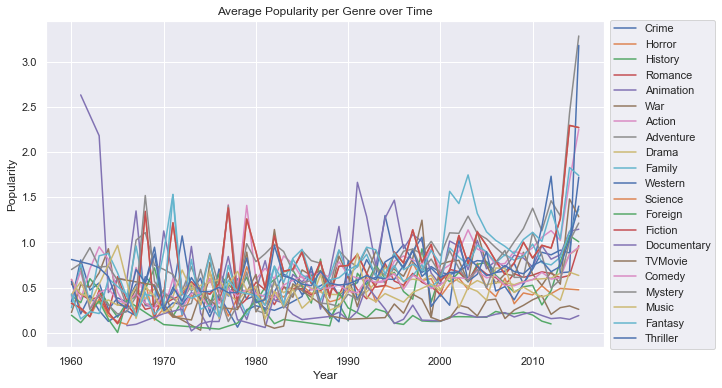

In [409]:
plt.figure(figsize=(10,6))
for column in unique:
    plt.plot(df[df[column] == 1].groupby('release_year')['popularity'].mean().index,
             df[df[column] == 1].groupby('release_year')['popularity'].mean().values, label=column)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Year'), plt.ylabel('Popularity')
plt.title('Average Popularity per Genre over Time')
plt.show()

- To get further insights regarding the research question, the genre with the highest popularity from year to year is represented below.
- The main insight is that the most popular genres have changed often from year to year. It becomes clear though that animation, adventure and fantasy movies were most popular in many years.

In [410]:
np.sort(df['release_year'].unique())

rating = pd.DataFrame({'Year': np.sort(df['release_year'].unique())})
for column in unique:
    rating = pd.merge(rating,
                      pd.DataFrame({'Year': df[df[column] == 1].groupby('release_year')['popularity'].mean().index,
                                    column: df[df[column] == 1].groupby('release_year')['popularity'].mean().values}), on='Year', how='left')

rating.fillna(0, inplace=True)

rating_per_year = pd.DataFrame({'Year': [], 'Genre': [], 'Popularity': []})

for i in np.arange(len(rating)):
    results = pd.DataFrame({'Year': [rating.loc[i, 'Year']],
                            'Genre': [rating.iloc[i, 1:].idxmax(axis=1)],
                            'Popularity': [rating.iloc[i, 1:].max()]})
    rating_per_year = rating_per_year.append(results, ignore_index=True)
rating_per_year


,Year,Genre,Popularity
0,1960.0,Thriller,0.811910
1,1961.0,Animation,2.631987
2,1962.0,Adventure,0.942513
3,1963.0,Animation,2.180410
4,1964.0,War,0.930959
5,1965.0,Music,0.968850
6,1966.0,Animation,0.585717
7,1967.0,Animation,1.348805
8,1968.0,Mystery,1.519456
9,1969.0,Crime,0.948020


- Indeed, movies including the genre **adventure** (14x), **animation** (11x) and **fantasy** (8x) were most popular in 33 of the 56 years.
- In sum, 13 genres were able to be most popular in at least one year.

In [411]:
rating_per_year.groupby('Genre', as_index=False)['Popularity'].count().sort_values(by='Popularity', ascending=False)

,Genre,Popularity
1,Adventure,14
2,Animation,11
5,Fantasy,8
3,Crime,5
4,Family,3
11,War,3
0,Action,2
7,Music,2
8,Mystery,2
9,Science,2


### Research Question 2: Have the average budgets for movies increased over time?

This research question may be relevant when it comes to determining the value of the movie industry.

- Descriptive statistics yield insights into the distribution of ***movie budgets***:
 - Movie budgets range from 0 USD (minimum) to 425.0M USD (maximum)
 - The average movie budget is 14.7M USD.
 - The 50% quantile value of 0 USD indicates that more than 50% of the movies had a budget of 0 USD.

In [412]:
df['budget'].describe()

count    1.080000e+04
mean     1.471114e+07
std      3.098677e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.564374e+07
max      4.250000e+08
Name: budget, dtype: float64

- To investigate the research question the mean budget was grouped for each year.
- The illustration below shows that the average budget increased steadily between 1960 (about 1M USD average budget) and 2000 (about 25M USD average budget) before dropping afterwards.

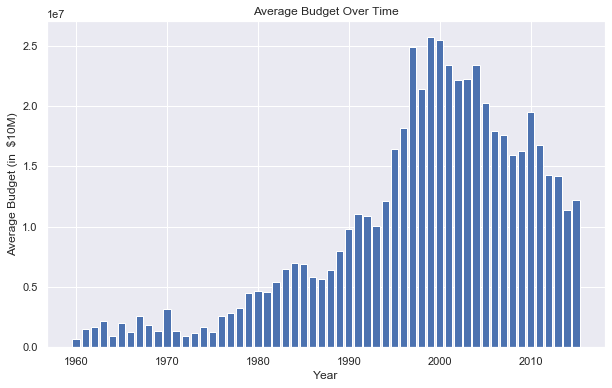

In [413]:
budget_over_time = df.groupby('release_year')['budget'].mean()

plt.figure(figsize=(10,6))
plt.bar(budget_over_time.index, budget_over_time.values);
plt.title('Average Budget Over Time')
plt.xlabel('Year'), plt.ylabel('Average Budget (in  $10M)');

### Research Question 3: Which genres were most successful in terms of profit?

- To get insights into this question, the mean profit was calculated for each of the 21 individual genres.


- The plot represented below yields the following findings:
 - The average profit of a movie is very different depending on its genre.
 - On average, **adventure movies** (USD 75.9M), **fantasy movies** (USD 64.0M) and **animation movies** (USD 52.6M) are most successful in terms of profit.
 - On the other extreme, **documentary movies** (USD 1.5M) and **foreign movies** (USD 0.1M) are least successful.
 - **TV movies** turn out to be inprofitable on average according to the underyling database.

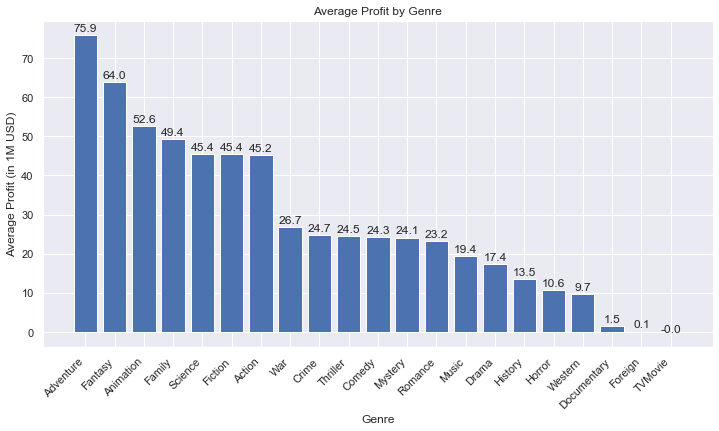

In [414]:
df['profit'] = df['revenue'] - df['budget']
profits = pd.Series(data=[], index=[])
for genre in unique:
    profits = profits.append(pd.Series(data=[round(df[df[genre] == 1]['profit'].mean())], index=[genre]))
profits.sort_values(inplace=True, ascending=False)
    
plt.figure(figsize=(12,6))
plt.bar(profits.index, profits.values/1000000)
plt.xticks(rotation=45, ha='right')
plt.title('Average Profit by Genre'), plt.xlabel('Genre'), plt.ylabel('Average Profit (in 1M USD)')
plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))
for i, v in enumerate(profits):
    if v < 0:
        plt.text(i, 0, str('%.1f' % (v/1000000)), ha='center')
    else:
        plt.text(i, v/1000000+1, str('%.1f' % (v/1000000)), ha='center')
plt.show()

### Research Question 4:  Which properties are associated with movies that have a high ratings?

- This question was tackled by generating a correlation matrix and generating plots for the features that correlate most with ***vote_average***.


- The ***vote_average*** correlates most with ***vote_count*** (0.26), ***popularity*** (0.21) and ***profit*** (0.19).
- The effect of these three features on the ***vote_average*** will be illustrated in order to get further insights.

In [415]:
correlation_matrix = df[['vote_average', 'popularity', 'budget', 'revenue', 'runtime', 'vote_count', 'release_year', 'profit']].corr()#.drop_duplicates(keep='first')
correlation_matrix

,vote_average,popularity,budget,revenue,runtime,vote_count,release_year,profit
vote_average,1.000000,0.213046,0.083637,0.175030,0.165142,0.256772,-0.122493,0.185241
popularity,0.213046,1.000000,0.544866,0.663095,0.140526,0.800710,0.091352,0.628839
budget,0.083637,0.544866,1.000000,0.734713,0.193901,0.632390,0.117442,0.569981
revenue,0.175030,0.663095,0.734713,1.000000,0.165231,0.791028,0.058090,0.976167
runtime,0.165142,0.140526,0.193901,0.165231,1.000000,0.165716,-0.117154,0.138098
vote_count,0.256772,0.800710,0.632390,0.791028,0.165716,1.000000,0.109144,0.755792
release_year,-0.122493,0.091352,0.117442,0.058090,-0.117154,0.109144,1.000000,0.032788
profit,0.185241,0.628839,0.569981,0.976167,0.138098,0.755792,0.032788,1.000000


1. Relationship between ***vote_count*** and ***vote_average***

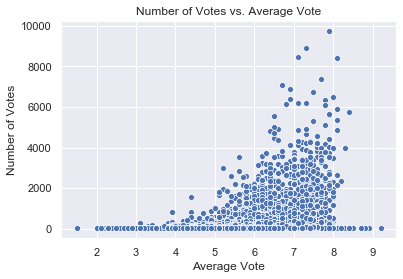

In [416]:
sns.scatterplot(df['vote_average'], df['vote_count'])
plt.xlabel('Average Vote'), plt.ylabel('Number of Votes')
plt.title('Number of Votes vs. Average Vote')
plt.show()

2. Relationship between ***popularity*** and ***vote_average***


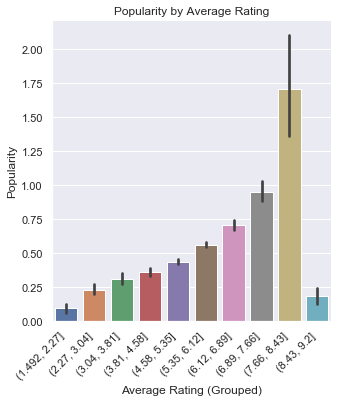

In [417]:
df['new'] = pd.cut(df['vote_average'], 10)

sns.catplot(x='new', y='popularity', data=df, kind="bar")
plt.xticks(rotation=45, ha='right'), plt.xlabel('Average Rating (Grouped)'), plt.ylabel('Popularity')
plt.title('Popularity by Average Rating')
plt.show()

3. Relationship between ***vote_count*** and ***profit***

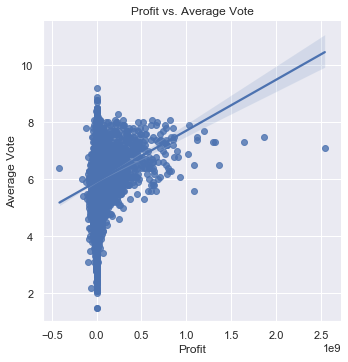

In [418]:
sns.lmplot(x="profit", y="vote_average", data=df);
plt.title('Profit vs. Average Vote')
plt.xlabel('Profit'), plt.ylabel('Average Vote');

<a id='conclusions'></a>
## Conclusions

**1. Which genres were most popular from year to year?**

 - The most popular genres have changed often from year to year
 - **Adventure** (14x), **animation** (11x) and **fantasy** (8x) were most popular in 33 of the 56 years.
 - In sum, 13 genres were able to be most popular in at least one year.


**2. Has the average budget for movies increased over time?**

 - The average budget increased steadily between 1960 (about 1M USD average budget) and 2000 (about 25M USD average budget) before dropping afterwards.


**3. Which genres were most successful in terms of profit?**

 - The average profit of a movie is very different depending on its genre.
 - On average, **adventure movies** (USD 75.9M), **fantasy movies** (USD 64.0M) and **animation movies** (USD 52.6M) are most successful in terms of profit.
 - On the other extreme, documentary movies (USD 1.5M) and foreign movies (USD 0.1M) are least successful.
 - TV movies turn out to be inprofitable on average according to the underyling database.


**4. What kinds of properties are associated with movies that have high ratings?**

 - The average voting of a movie correlates most with ***vote_count*** (0.26), ***popularity*** (0.21) and ***profit*** (0.19), the correlations are not very strong though. Visualizations have illustrated the relationship of ***vote_average*** and each of the three features:
 
   - ***vote_count:*** The positive relationship between ***vote_count*** on ***vote_average*** is distorted since many movies have a vote_count of 0.
   - ***popularity:*** Movies with a high average rating tend to be more popular, with one exception: Movies with an average rating between 8.43 and 9.2 turn out to have a low popularity.
   - ***profit:*** The positive effect of ***profit*** on ***vote_average*** is distorted though since many movies have independent of their average rating a profit of 0.
   
**Note:** The findings of this data analysis are tentative since inferential statistics or machine learning have not been applied in this project. 